# Question 1

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time

### Function gradient_descent:
**Arguments** : <br>
gradient : First Derivative of optimazation function<br>
init_ : Initial value of parameter<br>
learn_rate : Learning rate<br>
n_iter  : Number of iteration <br>
tol : Minimum absolut value of delta<br><br>
**Return** : <br>
x : Value of parameter for which gradient is zero(Rounding upto 3 decimal places)<br><br>
**Functinality**:<br>
This function is used to find the value of x for which the gradient is zero or less than absolute value delta.<br>
If function doesn't converges in n_iter then retured value may not be optional<br><br>
**Algorithm** :<br>
1. Initialze the value of x
2. for each iteration
    1. Calculate the delta as the amount of weight updated
    2. If absolute value of delta is less than tol
        1. Break
    4. Move in the negative direction of gradient i.e., delta
7. Return the final value of x


In [2]:
def gradient_descent(gradient, init_, learn_rate, n_iter = 50, tol = 1e-06):
    x = init_                                                                  #Initializing the parameter
    for _ in range(n_iter):
        delta = - learn_rate * gradient(x)                       #Calculating the update using grdient
        if np.all(np.abs(delta) <= tol):
            break                                                           #If value ofupdate is less than tol then break
        x += delta                                                        #Updating the parameter
    return round(x*1000) / 1000

### Solution 1.(a).(i)
Finding the value of x for which function f(x) is minimum.
\begin{equation}
  f(x) = x^{2} + 3x + 4
\end{equation}

\begin{equation}
  f'(x) = 2x + 3
\end{equation}

In [3]:
gradient_descent(gradient=lambda v: 2 * v + 3, init_= 4.0, learn_rate=0.2)

-1.5

###  Solution 1.(a).(ii)
Finding the value of x for which function f(x) is minimum.
\begin{equation}
  f(x) = x^{4} - 3x^{2} + 2x
\end{equation}

\begin{equation}
  f'(x) = 4x^3 - 6x + 2
\end{equation}

In [4]:
gradient_descent(gradient=lambda v: ((4 * (v**3)) - (6 * v) + 2), init_= 4.0, learn_rate=0.02)

-1.366

### Solution 1.(b)

### Function linearRegression:
**Arguments** : <br>
X : Feature Matrix<br>
Y : Label Vector<br>
init_m : initial value of slope (defaulf : 0)<br>
init_c : initial value of intercept (default : 0)<br>
learning_rate : Learning Rate<br>
n_iter : Number of iteration<br>
tol : Minimum absolut value of update<br><br>
**Return**:<br>
m : Optimal value of slope <br>
c : Optimal value of intercept<br><br>

**Functionality**:<br>
Finding the optimal line which fit the feature X and give the minimum eculdiean loss over label Y.<br>

**Algorithm**:<br>
1. Initialze m, c
2. for each itertion in n_iter
    1. Find the predicted label of Y using current m and c
    2. Calculate the gradient of m <br> \begin{equation} grad\_m = -\frac{2}{n}\sum_{i=1}^{n}x (y - \hat{y})  \end{equation}<br>
    3. calculate the gradient of c \begin{equation} grad\_c = -\frac{2}{n}\sum_{i=1}^{n} (y - \hat{y})  \end{equation} <br><br>
    5. If Update in m and c both are less than tol then we are stop further updating and assumes the gradient is converged.<br><br>
    6. Move in the negative direction of gradient for m  :  $m = m -  learning\_rate * grad\_m$
    7. Move in the negative direction of gradient for c    :  $c = c -  learning\_rate * grad\_c$ <br><br>
3. Return the optimal value of slope and intercept


In [5]:
def linearRegression(X, Y, init_m = 0, init_c = 0, learning_rate = 0.02, n_iter = 1000, tol = 1e-06):
    
    m = init_m                                                                                  #Initializing the parameter m (Slope)
    c = init_c                                                                                    #Initializing the parameter c (intercept)
    n = len(X)                                                                                  #Finding the length of X
    
    for i in range(n_iter):
        
        Y_Pred = m * X + c                                                               #Predicting the value of y
        
        grad_m = -(2 / n) * np.sum(X * (Y - Y_Pred))                       #Calculating the gradient of m
        
        grad_c = -(2 / n) * np.sum(1 * (Y-Y_Pred))                           #Calculating the gradient of c
        
        if (abs(learning_rate * grad_m) < tol) and (abs(learning_rate * grad_c) < tol):
            break                                                                                                                            #If update of m and c are less than tol --> break
        
        m = m - learning_rate * grad_m                                          #Updating the value of m
        c = c - learning_rate * grad_c                                              #Updating the value of c
        
    return m, c

### Solution 1.(c)

Generating artificial dataset for linear regrestion<br>
X = Array of 10000 values with mean = 1.5 and standard deviatin = 2.5
res = 10000 reidual terms

In [6]:
np.random.seed(0)
X = 2.5 * np.random.randn(10000) + 1.5
res = 1.5 * np.random.randn(10000)
y = 2 + 0.3 * X + res

In [7]:
a, b = linearRegression(X, y)

In [8]:
print("Optimal Value of slope : a = {}\nOptimal Value of intercept : b = {}".format(round(a, 2), round(b, 2)))

Optimal Value of slope : a = 0.3
Optimal Value of intercept : b = 2.02


### Solution 1.(d)

### Function batchLinearRegression:
**Arguments** : <br>
X : Feature Matrix<br>
Y : Label Vector<br>
batch_size : Size of batch that is being used to find the gradient<br>
init_m : initial value of slope (defaulf : 0)<br>
init_c : initial value of intercept (default : 0)<br>
learning_rate : Learning Rate<br>
n_iter : Number of iteration<br>
tol : Minimum absolut value of update<br><br>
**Return**:<br>
m : Optimal value of slope <br>
c : Optimal value of intercept<br><br>

**Functionality**:<br>
Finding the optimal line which fit the feature X and give the minimum eculdiean loss over label Y.<br>

**Algorithm**:<br>
1. Initialze m, c
2. for each itertion in n_iter
    1. Find the batch of feature (batch_X) and label (batch_Y)without replacement 
    2. Find the predicted label of batch_Y (batch_Y_Pred) using current m and c
    3. Calculate the gradient of m <br> \begin{equation} grad\_m = -\frac{2}{batch\_size}\sum_{i=1}^{batch\_size}x (y - \hat{y})  \end{equation}<br>
    4. calculate the gradient of c<br> \begin{equation} grad\_c = -\frac{2}{batch\_size}\sum_{i=1}^{batch\_size} (y - \hat{y})  \end{equation}<br><br>
    5. If Update in m and c both are less than tol then we are stop further updating and assumes the gradient is converged.<br><br>
    6. Move in the negative direction of gradient for m  :  $m = m -  learning\_rate * grad\_m$
    7. Move in the negative direction of gradient for c    :  $c = c -  learning\_rate * grad\_c$<br><br>
3. Return the optimal value of slope and intercept


In [9]:
def batchLinearRegression(X, Y, batch_size, init_m = 0, init_c = 0, learning_rate = 0.02, n_iter = 1000, tol = 1e-06):
    
    m = init_m                                                                                                  #Initializing the parameter m (Slope)
    c = init_c                                                                                                     #Initializing the parameter c (intercept)
    n = len(X)                                                                                                    #Finding the length of X
    index = list(range(n))                                                                                  #Creating the list of index
    
    for i in range(n_iter):
        
        rand_idx = np.random.choice(index, batch_size, replace=False)         #Randomly selecting the index for batch of batch_size
        
        batch_X = np.array([X[i] for i in rand_idx])                                           #Creating the batch_X using random_index
        batch_Y = np.array([Y[i] for i in rand_idx])                                           #Creating the batch_Y using random_index

        Y_Pred = m * batch_X + c                                                                    #Predicting the value of y
        
        grad_m = -(2 / batch_size) * np.sum(batch_X * (batch_Y - Y_Pred))    #Calculating the gradient of m
        
        grad_c = -(2 / batch_size) * np.sum(1 * (batch_Y - Y_Pred))                 #Calculating the gradient of c
        
        if (abs(learning_rate * grad_m) < tol) and (abs(learning_rate * grad_c) < tol):
            break                                                                                                                  #If update of m and c are less than tol --> break
        
        m = m - learning_rate * grad_m                                                            #Updating the value of m
        c = c - learning_rate * grad_c                                                               #Updating the value of c
        
    return m, c

In [10]:
a, b = batchLinearRegression(X, y, batch_size=1, learning_rate=0.002, n_iter=2000)
print("Optimal Value of slope : a = {}\nOptimal Value of intercept : b = {}".format(round(a, 2), round(b, 2)))

Optimal Value of slope : a = 0.36
Optimal Value of intercept : b = 2.04


#### Calculating the time taken for the execution of Stochastic Gradient Descent

In [11]:
tic = time.time()
a, b = batchLinearRegression(X, y, 1)
toc = time.time()
print("Total time for execution of SGD : {} seconds".format(round(toc - tic, 4)))

Total time for execution of SGD : 1.3235 seconds


#### Calculating the time taken for the execution of Gradient Descent

In [12]:
tic = time.time()
a, b = batchLinearRegression(X, y, len(X))
toc = time.time()
print("Total time for execution of GD : {} seconds".format(round(toc - tic, 4)))

Total time for execution of GD : 2.997 seconds


From the above two cell it can be clrealy seen that .**Stochastic Gradient Descent is faster than Gradient Descent**.

### Finding the optimal batch size

Parameter for finding the optimal batch size
1. Having minimum mean squared error 
2. Execution in less time


There is trade-off between accuracy and time for finding the optimal batch size.
1. On increasing the batch size accuracy increases (because convergence is smoother with large batch).
2. On increasing the batch size time complexity also increases (takes longer time to calculate the gradient of large batch)

This means if SGD is faster but less accurate and GD is slower but vary accurate. Therefore we need to find out an optimal batch size which take less time GD and give good accuracy.

**Note**<br>
1.  We are defining the batch size in power of 2 (i.e., 1, 2, 8.....) because it is most efficient size in computer science.
2. Record the time taken by each batch for calculating the gradient.
3. Record the accuracy for each batch size

Formula for calculating the Mean Squared error
\begin{equation} MSE = \frac{1}{n}\sum_{i = 1}^{n}(y - \hat{y})^2 \end{equation}

We are executing the mini batch gradient descent **10** for each batch_size and taking average of for more accurate measurement of error and time taken by each batch size

In [13]:
avg_mse = []                                                                   #List for recording the error for each batch
avg_time_diff = []                                                                      #List for recording the error for each batch

for i in range(14):                                                              #Looping over all batch size in power of 2 (less then len(X))
   
    mse= []                                                                     #For storing the mse for single batch_size
    td = []                                                                        #For storing the time taken for single batch_size
   
    for k in range(10):                                                             #Looping 10 time over single batch size for more accurate measurement 
        
        tic = time.time()                                                               #Starting the Time
        m, c = batchLinearRegression(X, y, np.power(2, i))       #Finding the optimal slope and intercept for batch of batch_size = 2^i
        toc = time.time()                                                              #Stoping the time
    
        ypred = (m * X) + c                                                        #Calculating the y_pred
    
        mse.append(np.sum((y - ypred) ** 2)/ len(y))               #Calculating the mean square error
    
        
    
        td.append(round((toc - tic) * 1000) / 1000)                    #Record the time taken by this batch
        
    avg_mse.append(np.mean(mse))                                    #appending the mean value of mse error 
    avg_time_diff.append(np.mean(td))                                 #appending the mean value of time taken

Normalizing the rmse_error and time_diff using min-max scaler so that both come in same range and we can then plot it to find the optimal batch size<br>
**Min-Max Scalar**
\begin{equation} x[i] = \frac{x[i] - X_{min}}{X_{max} - X_{min}} \end{equation}

This will bring all the values between 0 and 1.

In [14]:
rmse = np.array(avg_mse)
rmse = (rmse - min(rmse)) / (max(rmse) - min(rmse))

In [15]:
timetaken = np.array(avg_time_diff)
timetaken = (timetaken - min(timetaken)) / (max(timetaken) - min(timetaken))

Ploting the graph of normalized rmse _error and time_diff

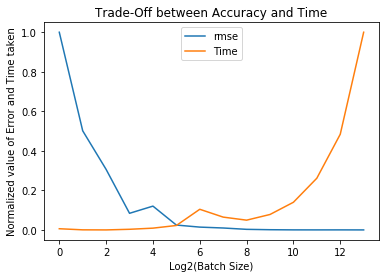

In [16]:
plt.plot(list(range(14)), rmse)
plt.plot(list(range(14)), timetaken)
plt.xlabel("Log2(Batch Size)")
plt.ylabel("Normalized value of Error and Time taken")
plt.legend(["rmse", "Time"])
plt.title("Trade-Off between Accuracy and Time")
plt.show()

### Conclusion from the above graph
1. Batch_size = 8192  :  give best accuracy but take longer time
2. Batch_size = 1 or 2 or 4   :   give less accuracy but are fast

From the graph we can say that **batch of size 32** will be optimal.

#### But optimal batch size is an hyper parameter it varies according the problem defination other paramerter
means it may be 32 this time but changes next time. After executing multiple time optimal batch size come from this set **{32, 64, 128}**.

# Question 2

Lets use short abbreviation for each event in the Bayesian Network for ease of readability 
1. S : Smokes
2. LD : Lung Disease
3. C : Cold
4. Co :Cough
5. F : Fever
6. SB : Shortness of breath
7. CP : Chest Pain

### Solution 2.(i). The probability that someone has both cold and a fever

In the Bayesian Network Fever is dependent on Cold. So, the probability that someone has both fever and cold can be calculated as 

\begin{equation}P(C,F) = P(F |C)\;P(C) \end{equation}

\begin{equation} = 0.307 * 0.02 \end{equation}

\begin{equation}= 0.00614 \end{equation}

### Solution 2.(ii). The probability that someone who has a cough has a cold


The probability of having cold given that he(she) has Cough can be calculated as follows: 

\begin{equation}P(C\;|\;Co) = \frac{P(C, Co)}{P(Co)} ..........(1)\end{equation}

To calculated above probability we need to find $P(Co, C)$ and $P(Co)$. <br><br>


From the Bayesian Network there is dependency of Lung Disease on Cough. So we need to first find out the $P(LD)$ and $P(\overline{LD})$

Since Lung Disease is dependent over Smokes, probability of having Lung Disease wil be:

\begin{equation} P(LD) = P(LD|S)P(S) + P(LD|\overline {S})P(\overline{S}) \end{equation}

\begin{equation}P(LD) = 0.1009*0.2+0.001*0.8 = 0.02098 \end{equation}

and probability of not having Lung Disease will be $P(\overline{LD}) = 1 - P(LD) = 0.97902$<br><br>



Now, lets calculated probability that someone has both Cold and Cough i.e.,$P(Co,C)$

\begin{equation}  P(Co, C) = P(Co, C, LD) + P(Co, C, \overline{LD} ) \end{equation}

From the Bayesian Network Cold and Lung Disease are not dependent then, 

\begin{equation} P(Co, C) = P(Co|C, LD)P(C)P(LD) + P(Co|C, \overline{LD})P(C)P(\overline{LD}) \end{equation}

\begin{equation}P(Co, C) = 0.7525*0.02*0.02098 + 0.505*0.02*0.97902\end{equation}

\begin{equation} P(Co, C) = 0.010203851 ..........(2)\end{equation}<br><br>



Now calculate the probability of Denominator i.e., $P(Co)$

\begin{equation}P(Co) = P(Co, LD, C) + P(Co, LD, \overline{C}) + P(Co, \overline{LD}, C) + P(Co, \overline{LD}, \overline{C}) \end{equation}

\begin{equation}P(Co) =  P(Co|LD, C)\,P(LD)\,P(C) + P(Co|LD, \overline{C})\,P(LD)\,P(\overline{C}) + P(Co|\overline{LD},C)\,P( \overline{LD})\,P(C) + P(Co|\overline{LD},\overline{C})\,P(\overline{LD})\,P(\overline{C})\end{equation}

\begin{equation}P(Co) = 0.7525*0.02098*0.02 +  0.505*0.02098*0.98 +  0.505*0.97902*0.02 + 0.01*0.97902*0.98\end{equation}

\begin{equation}P(Co) =0.000315749 + 0.010383002 +  0.009888102 + 0.009594396\end{equation}

\begin{equation} P(Co) = 0.030181249 ..........(3)\end{equation}<br><br>

Now, putting values from equation (2) and (3) in equation (1) we get,  

\begin{equation}P(C\;|\;Co) = \frac{P(C\;and\;Co)}{P(Co)} \end{equation}

\begin{equation} = \frac{0.010203851}{0.030181249}\end{equation}

\begin{equation} = 0.338085776\end{equation}

# Question 3

### Solution 3.
Let $X$ be a RV following multinomial distribution,<br> 
$K$ be the total  number of possible outcomes<br>
$x_i$ be number of success of the $i^{th}$ outcomes in $n$ random trials<br>
$p_i$ be the probability of success of the $i^{th}$ outcomes. Then, 

\begin{equation} P(X = x|n, p) =  {n \choose {x_1, x_2 ... x_K}}\prod_{i=1}^Kp_i^{x_i} = n!\prod_{i = 1}^K\frac{p_i^{x_i}}{x_i!}\end{equation}

where, 

\begin{equation} \sum_{i=1}^Kx_i = n \end{equation}and \begin{equation}  \sum_{i = 1}^Kp_i = 1\end{equation}

The log likelihood of multinomial distribution is given as, 

\begin{equation} \mathcal{LL}(p) = \log\left({{n \choose {x_1, x_2 ... x_k}}\prod_{i = 1}^Kp_i^{x_i}}\right) \end{equation}

\begin{equation}  = \log{n \choose{x_1, x_2...x_K}}  + \log\prod_{i = 1}^{K}p_i^{x_i}\end{equation}


\begin{equation} = \log{n \choose{x_1, x_2...x_K}} + \sum_{i = 1}^{k} \log{p_i^{x_i}} \end{equation}

\begin{equation} = \log{n \choose{x_1, x_2...x_K}} + \sum_{i = 1}^{k}x_i\log{p_i} \end{equation}

Since the above log likelihood function has a constrained $\sum_{i = 1}^{K}p_i = 1$, we have to introduce constrained with a Lagrange multiplier $\lambda$ into the equation.

\begin{equation}  \mathcal{LL}(p, \lambda) = \mathcal{LL}(p) + \lambda\left( 1 - \sum_{i=1}^Kp_i \right)\end{equation}

\begin{equation}  \mathcal{LL}(p, \lambda) = \log{n \choose{x_1, x_2...x_K}} + \sum_{i = 1}^Kx_ilog{p_i} + \lambda\left( 1 - \sum_{i=1}^Kp_i \right)\end{equation}

$\mathcal{LL}(p. \lambda)$ is also called as Lagrangian.

To find the $argmax_p \mathcal{LL}(p, \lambda)$ we have to differrentiate the Lagrangian function with respect to $p_i$ and $\lambda$ and setting it $0$. 

\begin{equation} \frac{\partial{}}{\partial{p_i}} \mathcal{LL}(p, \lambda) = 0\>\> and \>\>\frac{\partial{}}{\partial{\lambda}} \mathcal{LL}(p, \lambda) = 0 \end{equation}

First differentiating it wrt  $\lambda$ and setting it to $0$

\begin{equation} \frac{\partial{}}{\partial{\lambda}} \mathcal{LL}(p, \lambda)  = 0\end{equation}

\begin{equation}  1 - \sum_{i = 1}^Kp_i  = 0\end{equation}

\begin{equation} \sum_{i = 1}^{K}p_i = 1\end{equation}

Now differentiating it wrt  $p_i$ and setting it to $0$

\begin{equation} \frac{\partial{}}{\partial{p_i}} \mathcal{LL}(p, \lambda)   = 0\end{equation}

\begin{equation} \frac{x_i}{p_i} + \lambda(-1)  = 0\end{equation}


\begin{equation} x_i = \lambda p_i  \end{equation}

\begin{equation}p_i = \frac{x_i}{\lambda} ....(1)\end{equation}

Summning over all i

\begin{equation} \sum_{i = 1}^{K}x_i = \sum_{i = 1}^K\lambda p_i \end{equation}

\begin{equation} n = \lambda ....(2)\end{equation}

Putting the value of $\lambda$ from equation (2) to equation (1) we get, 

\begin{equation} p_i = \frac{x_i}{n} \end{equation}

Now, the probability distribution after MLE

\begin{equation} P\left(\frac{x_1}{n}, \frac{x_2}{n}.....\frac{x_K}{n}\right) \end{equation}